# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = 400104867
full_name = "Payam Taebi"
assert student_number and full_name is not None, 'pls input your information'

# Introduction

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [3]:
url = 'nutrition.csv'  # Replace with the actual URL or local path
df = pd.read_csv(url)

print(len(df))
df.head()

8618


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [4]:
print("Dataset Information:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Display number of missing values in each column
print("\nMissing Values in Each Column:")
print(df.isna().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           861

Exclude the non-numeric features (you will need these features later in the notebook).

In [5]:
non_numeric_cols = df.select_dtypes(include=['object']).columns

df_numeric = df.drop(columns=non_numeric_cols)

df_numeric.set_index('ID', inplace=True)

print("\nFirst Few Rows of Numeric Data:")
df_numeric.head()


First Few Rows of Numeric Data:


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [6]:
df_non_numeric = df[non_numeric_cols]

print("\nFirst Few Rows of Non-Numeric Data:")
df_non_numeric.head()


First Few Rows of Non-Numeric Data:


,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName
0,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN
1,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN
2,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN
3,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN
4,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

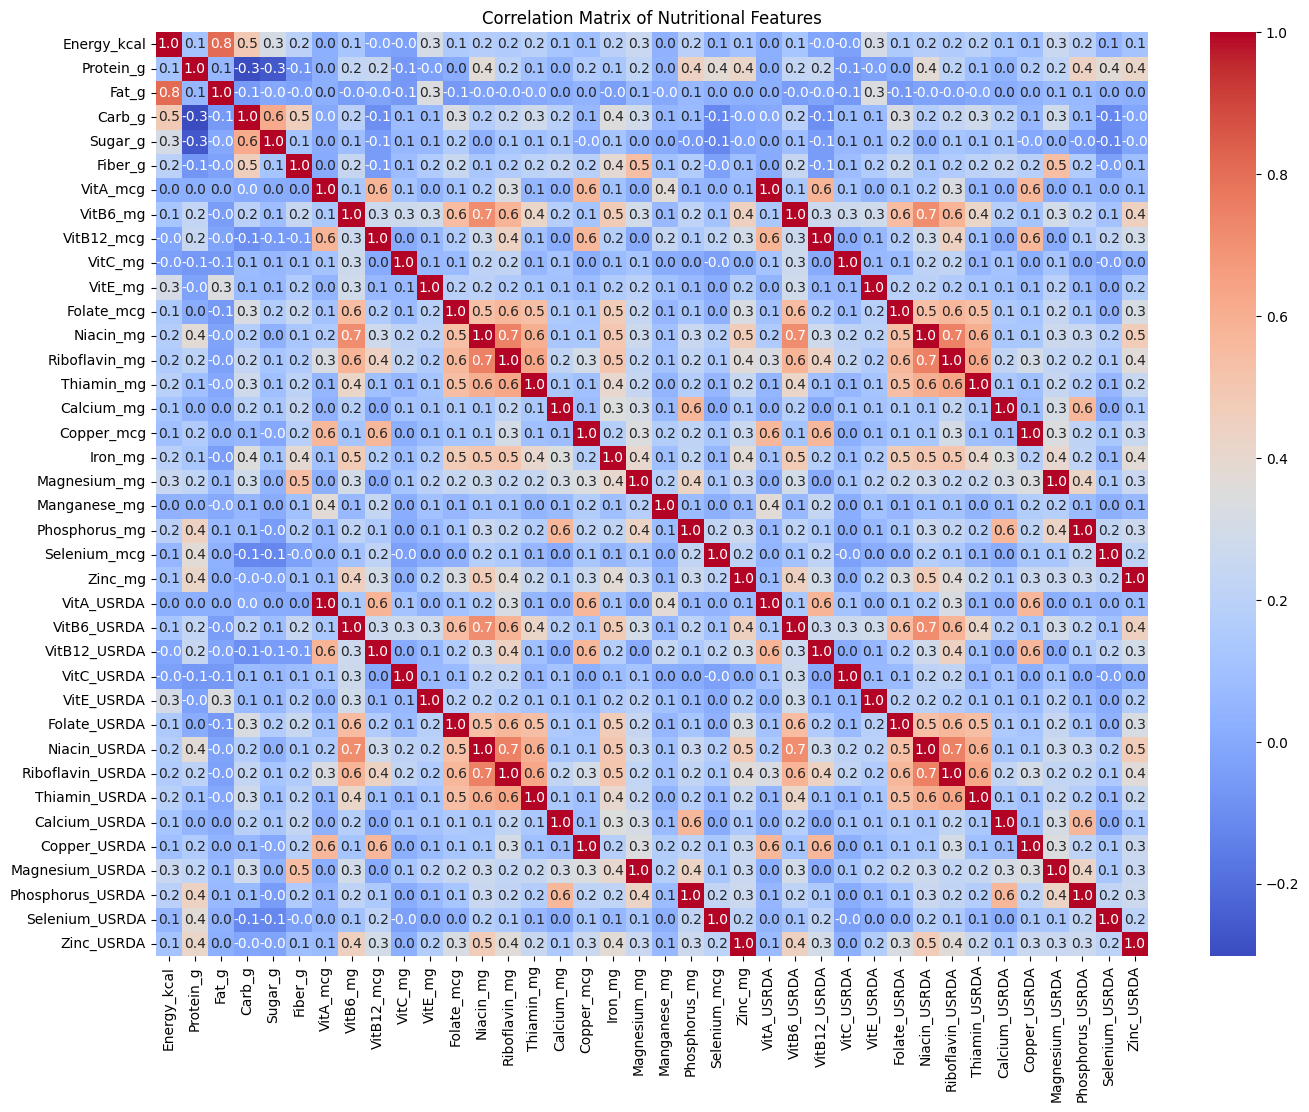

In [7]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(16, 12))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True)

# Add title
plt.title('Correlation Matrix of Nutritional Features')

# Show plot
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

Highly Correlated Feature Pairs:
VitA_USRDA and VitA_mcg with correlation coefficient of 1.00
VitB6_USRDA and VitB6_mg with correlation coefficient of 1.00
VitB12_USRDA and VitB12_mcg with correlation coefficient of 1.00
VitC_USRDA and VitC_mg with correlation coefficient of 1.00
VitE_USRDA and VitE_mg with correlation coefficient of 1.00
Folate_USRDA and Folate_mcg with correlation coefficient of 1.00
Niacin_USRDA and Niacin_mg with correlation coefficient of 1.00
Riboflavin_USRDA and Riboflavin_mg with correlation coefficient of 1.00
Thiamin_USRDA and Thiamin_mg with correlation coefficient of 1.00
Calcium_USRDA and Calcium_mg with correlation coefficient of 1.00
Copper_USRDA and Copper_mcg with correlation coefficient of 1.00
Magnesium_USRDA and Magnesium_mg with correlation coefficient of 1.00
Phosphorus_USRDA and Phosphorus_mg with correlation coefficient of 1.00
Selenium_USRDA and Selenium_mcg with correlation coefficient of 1.00
Zinc_USRDA and Zinc_mg with correlation coefficien

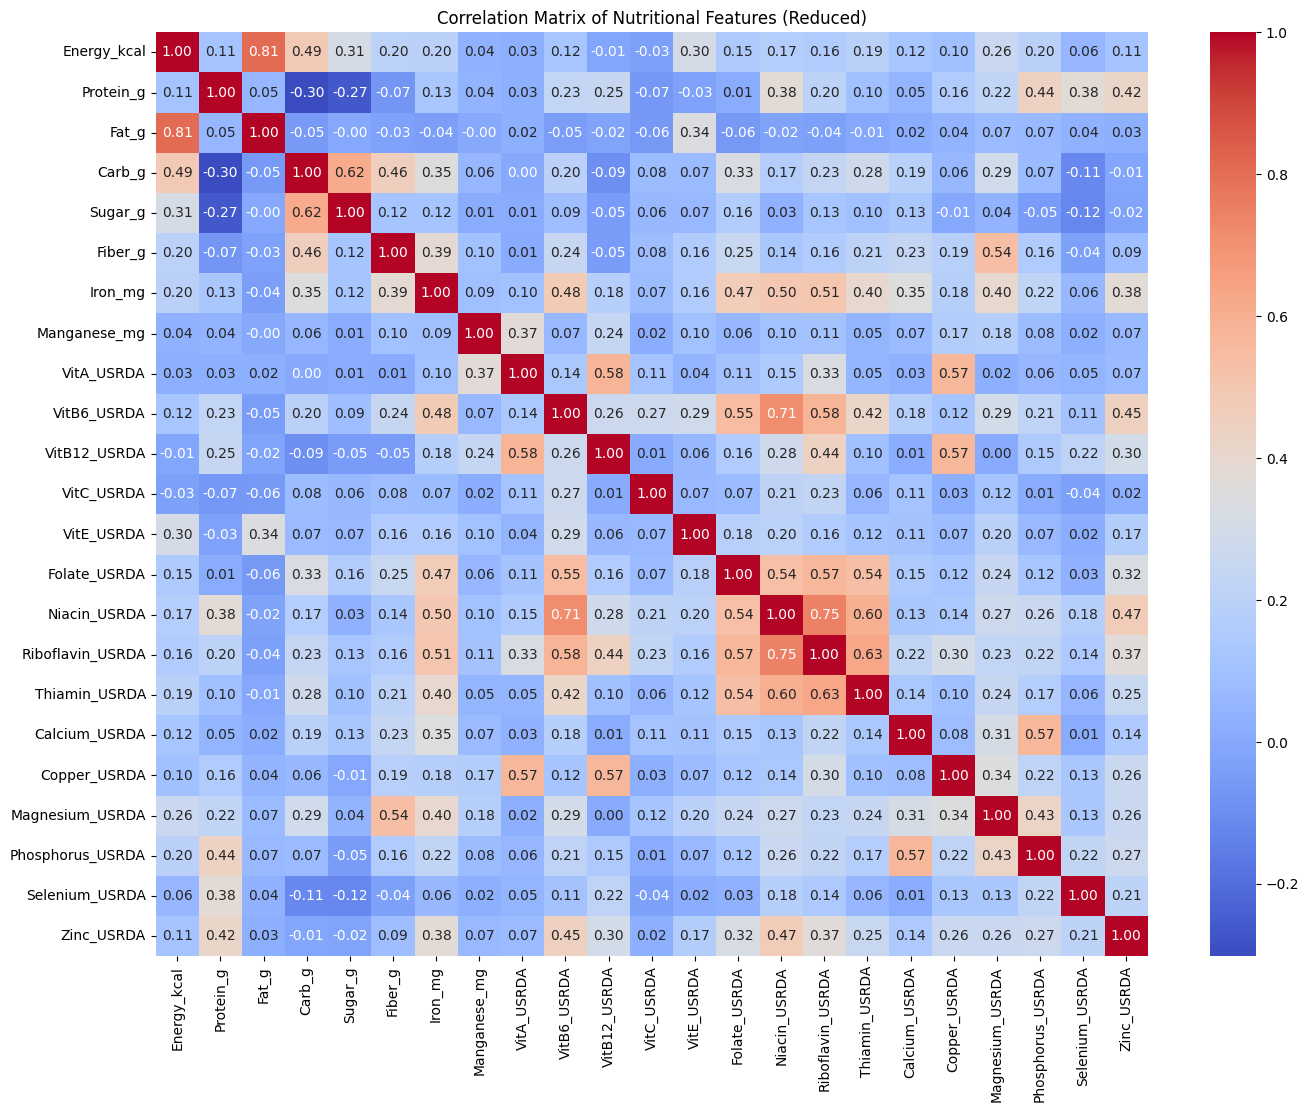

In [8]:
# Set the threshold for high correlation
threshold = 0.9

# Identify pairs of features with high correlation
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            high_correlation_pairs.append(pair)

# Display the highly correlated pairs
print("Highly Correlated Feature Pairs:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation coefficient of {pair[2]:.2f}")


# Set to keep track of features to remove
features_to_remove = set()

# Add second feature of each pair to the set of features to remove
for pair in high_correlation_pairs:
    features_to_remove.add(pair[1])

# Remove redundant features from the dataframe
df_reduced = df_numeric.drop(columns=features_to_remove)

# Display the reduced dataframe information
print("Features removed due to high correlation:")
print(features_to_remove)
print("\nDataframe shape after removing redundant features:", df_reduced.shape)



# Calculate the new correlation matrix for the reduced dataframe
reduced_correlation_matrix = df_reduced.corr()

# Plot the new correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(reduced_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Nutritional Features (Reduced)')
plt.show()


Explore the dataset by plotting the distribution of each feature separately.

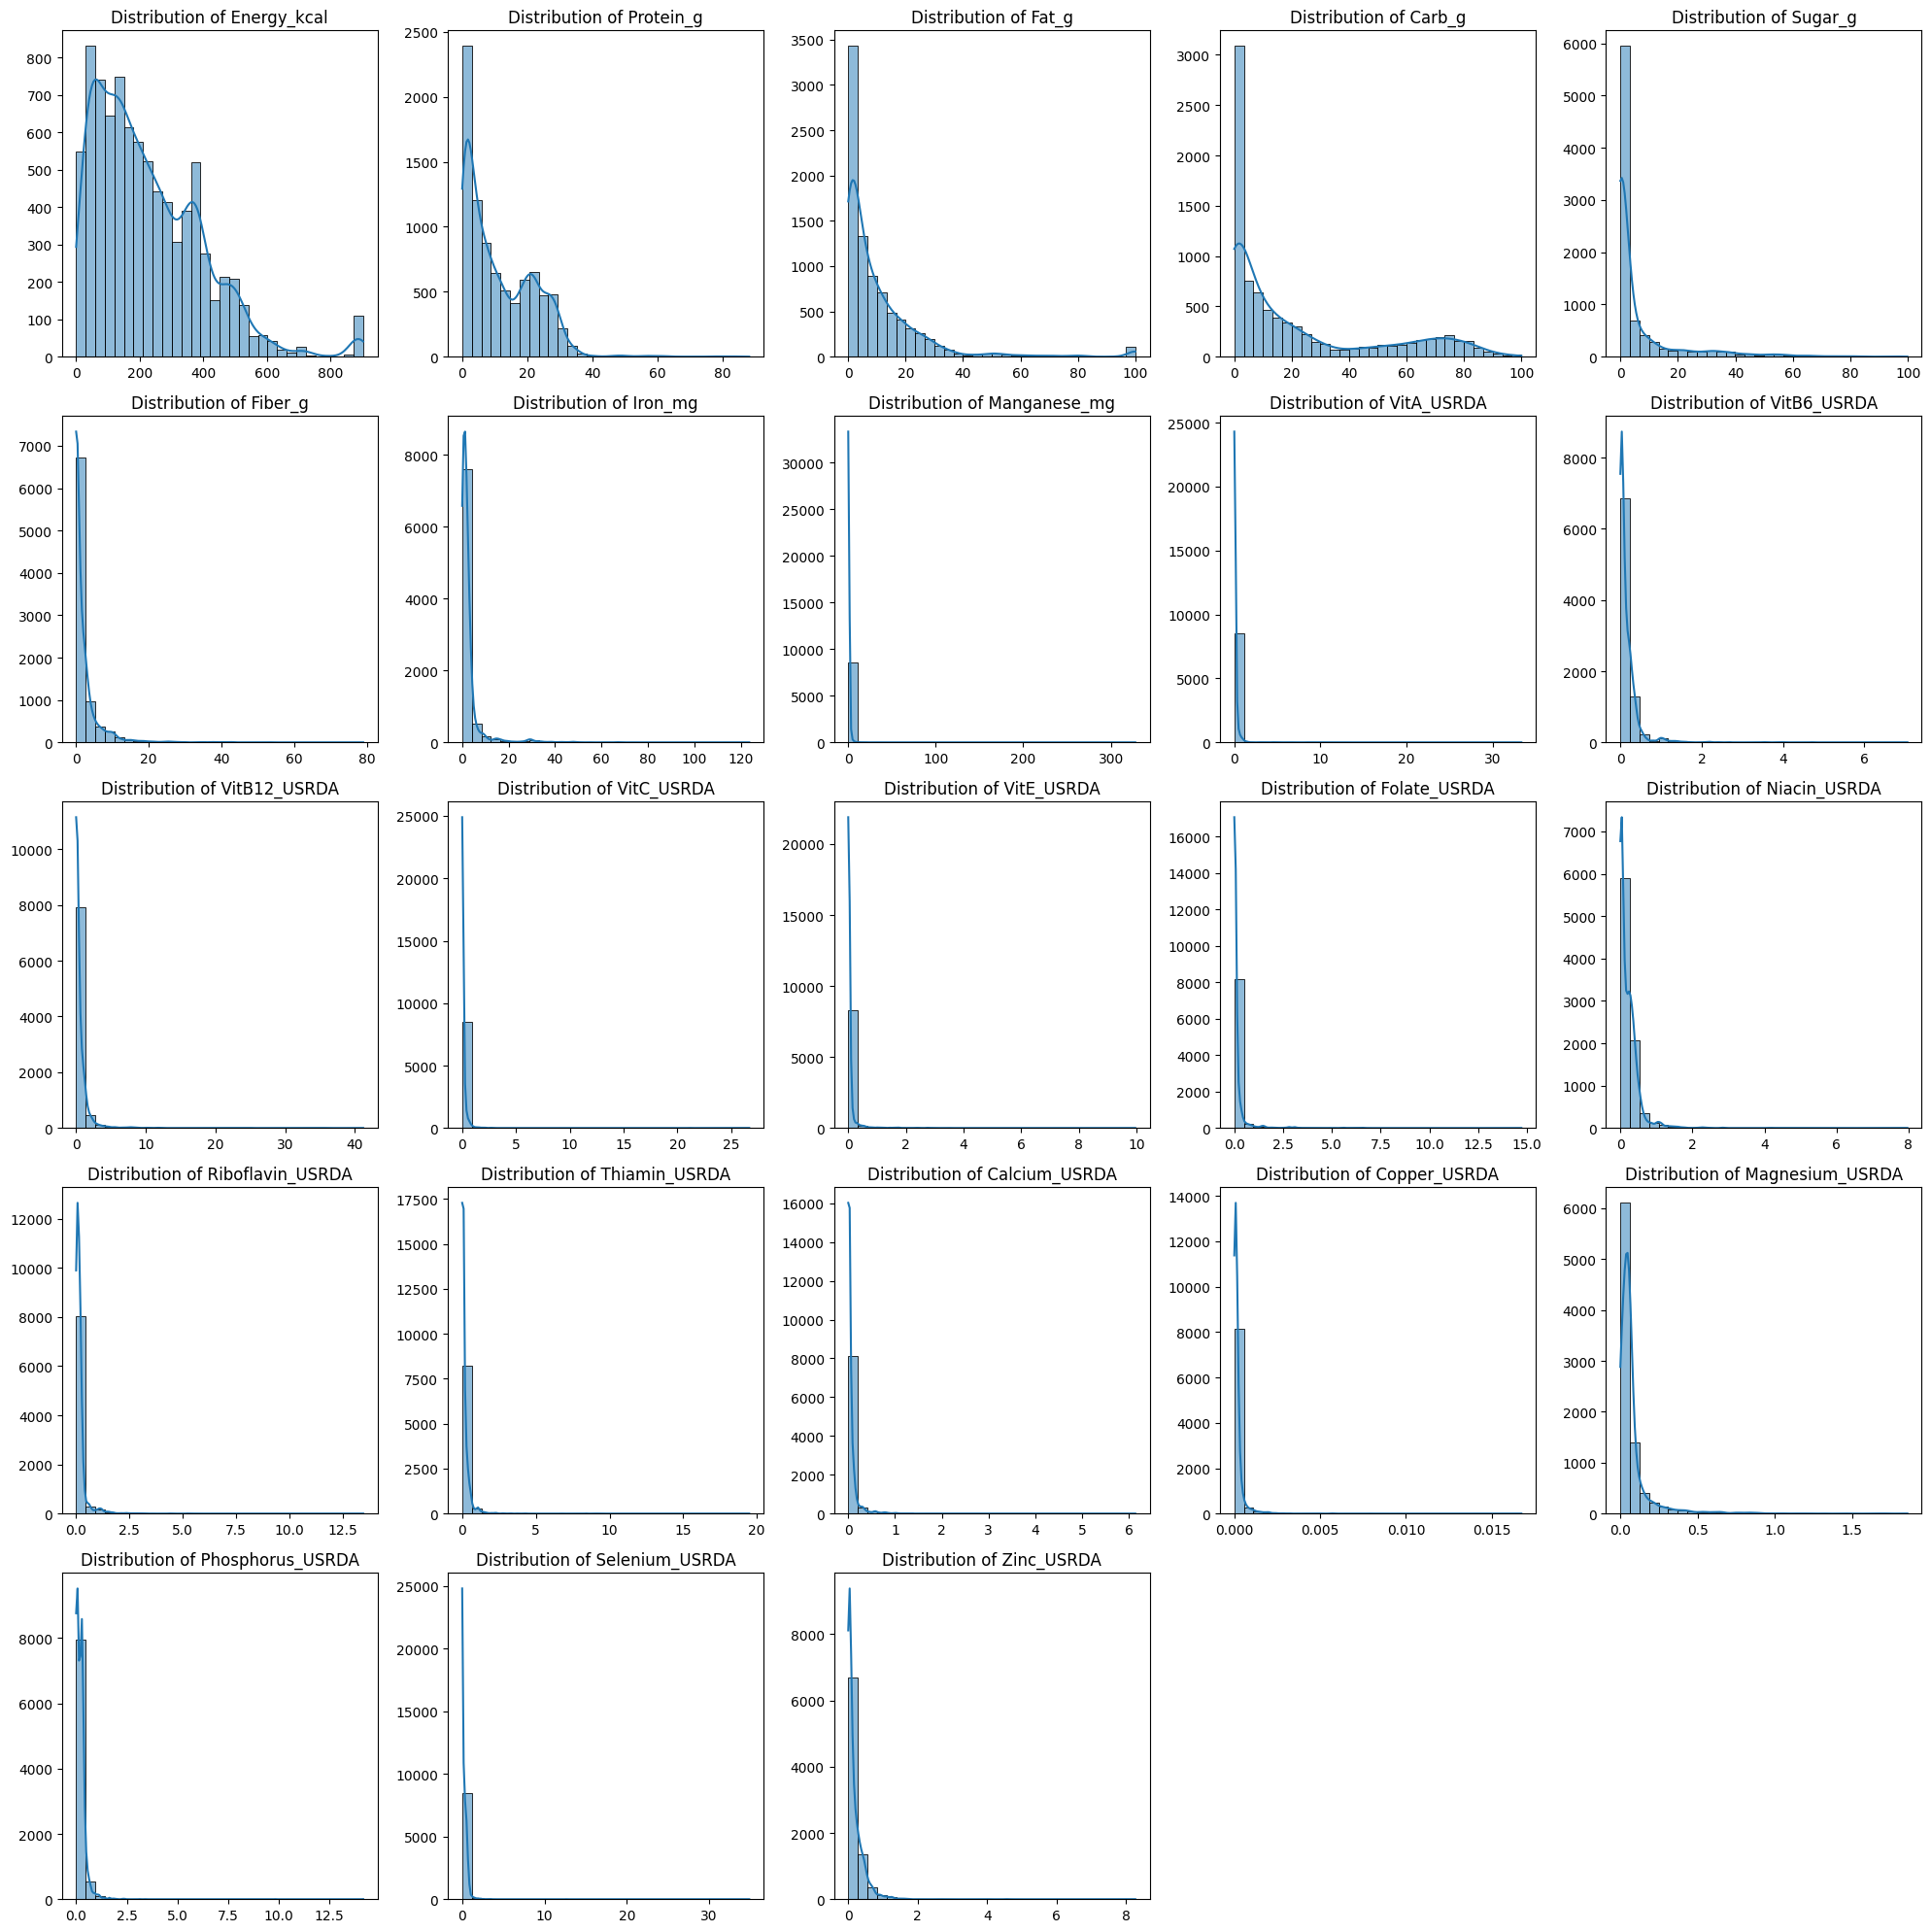

In [9]:
num_features = df_reduced.shape[1]
num_cols = 5
num_rows = int(np.ceil(num_features / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Plot distribution of each feature
for i, col in enumerate(df_reduced.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(df_reduced[col], kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [15]:
from scipy.stats import boxcox
df_reduced_copy = df_reduced.copy()
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df_reduced_copy  = df_reduced_copy  + 1
df_boxcoxed = pd.DataFrame(index=df_reduced_copy.index)

for i in df_reduced_copy.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df_reduced_copy.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

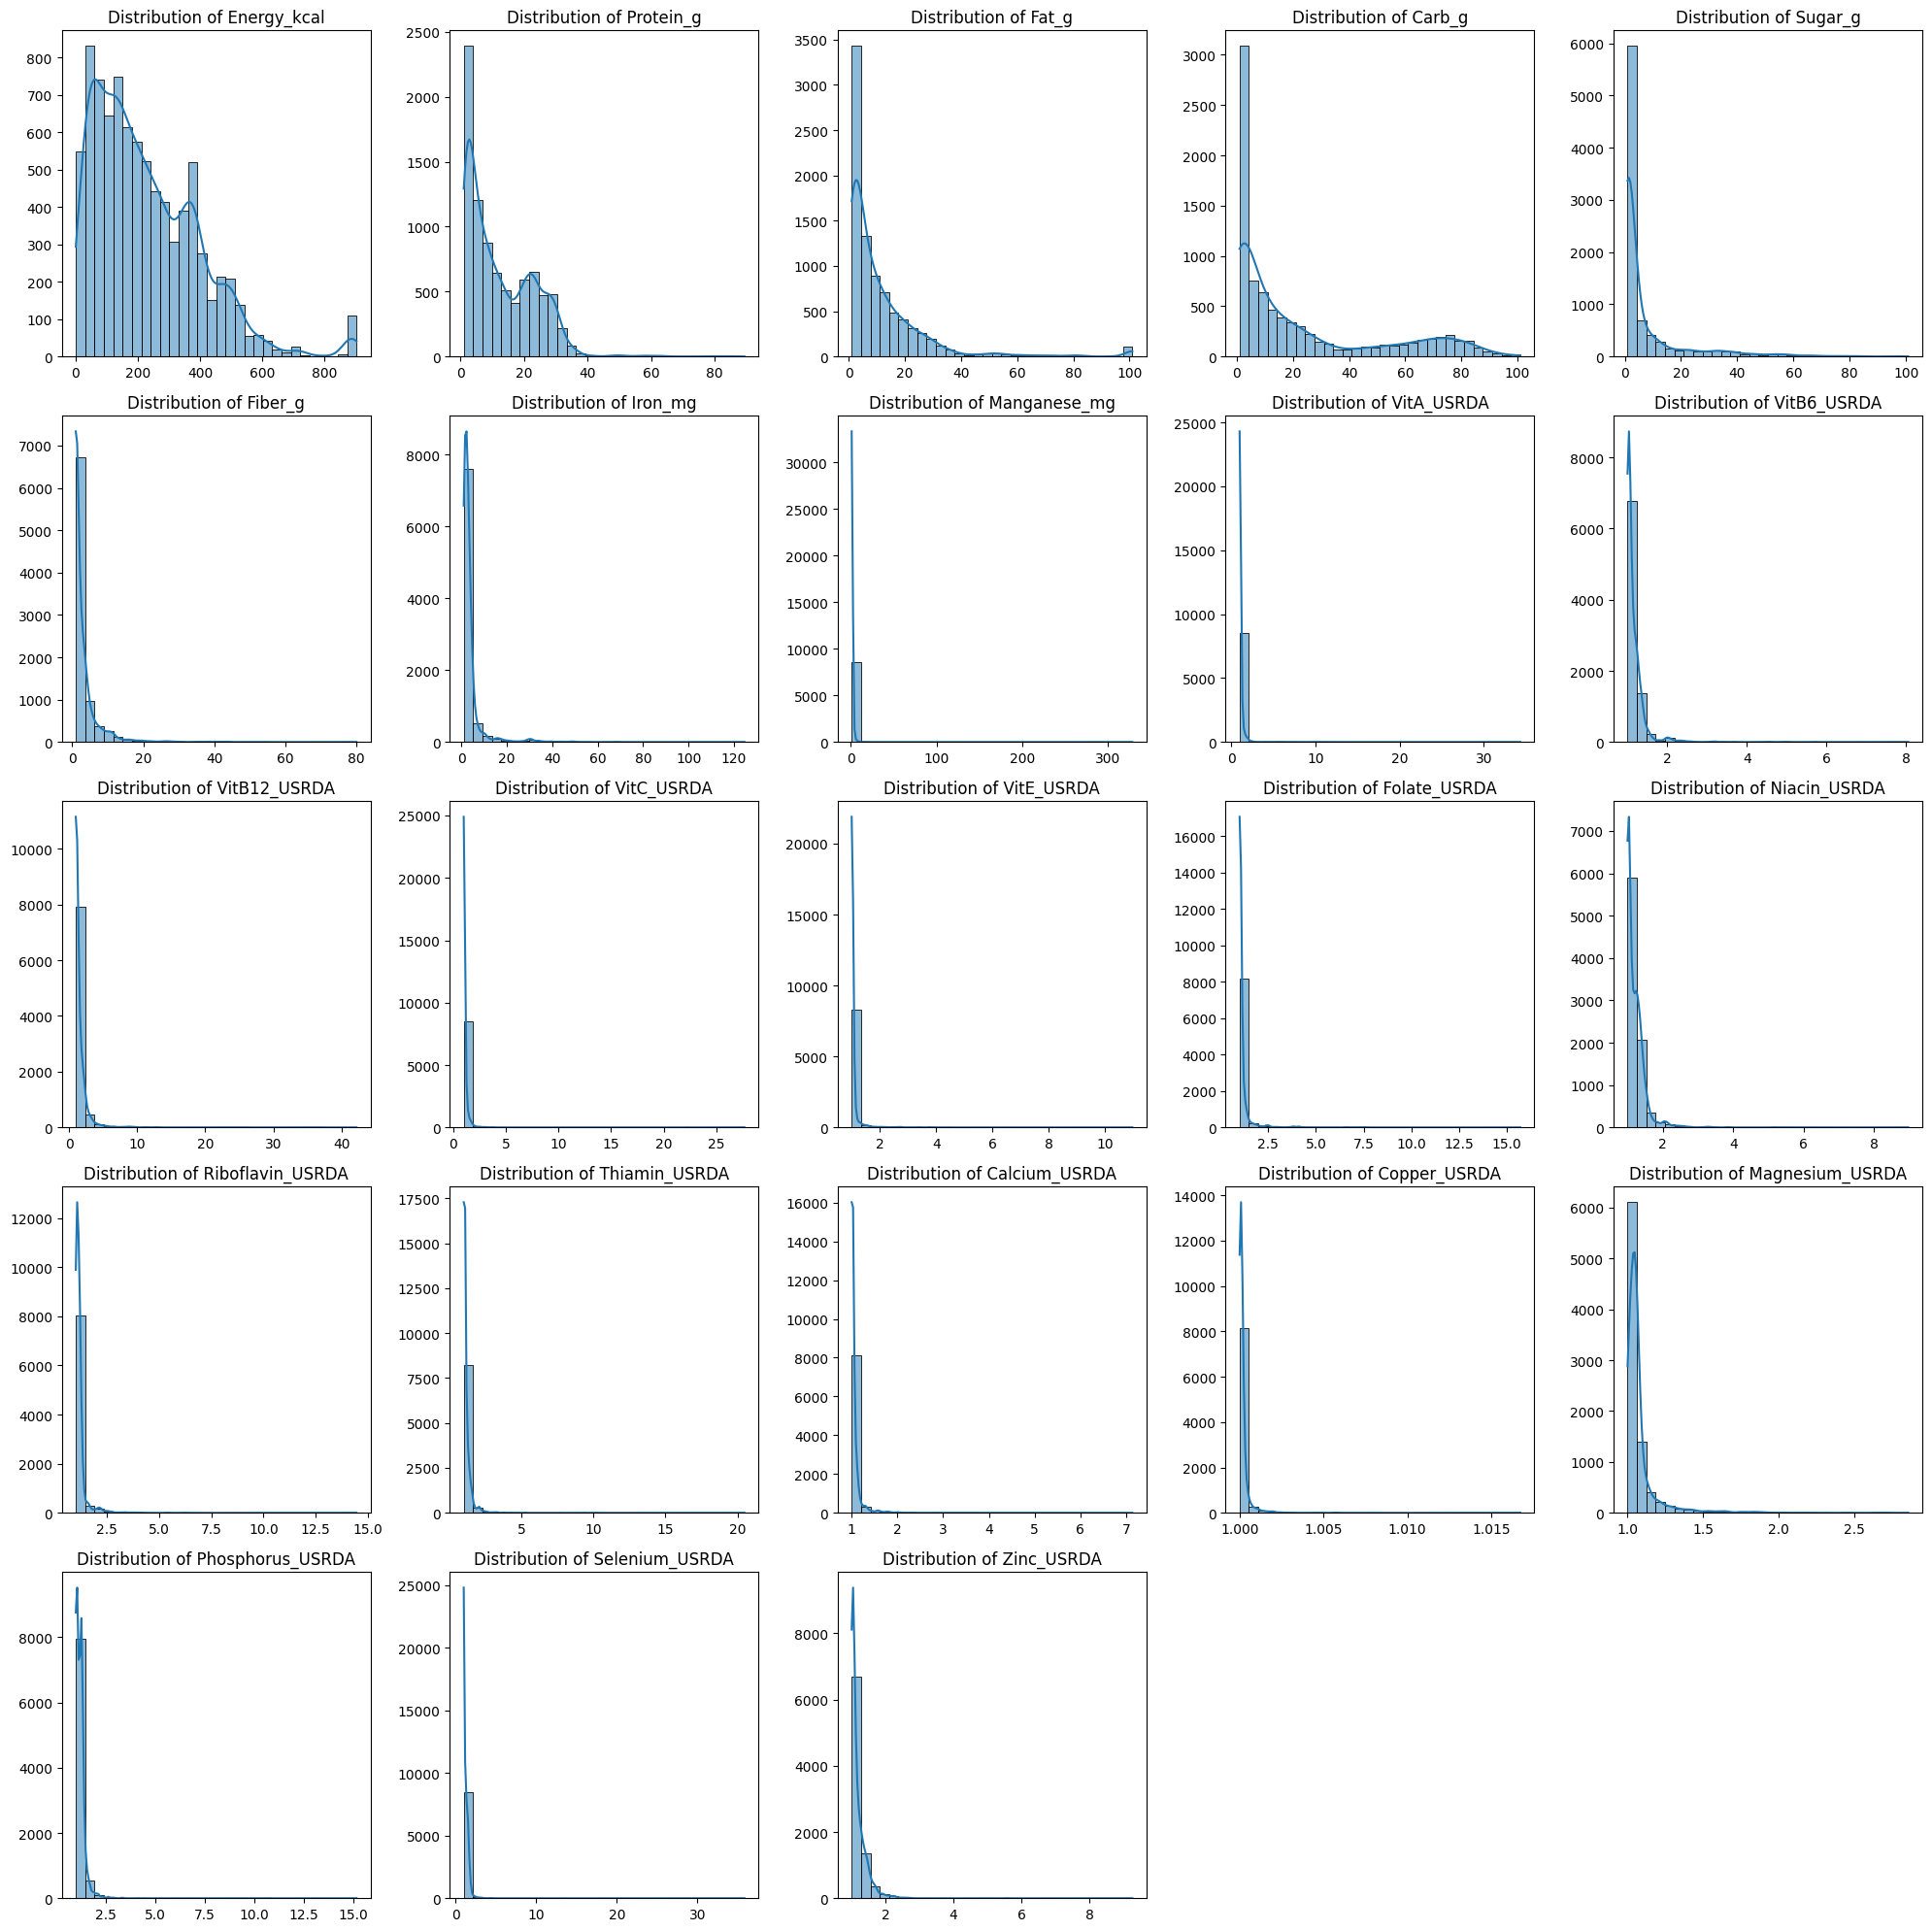

In [16]:
num_features = df_reduced_copy.shape[1]
num_cols = 5
num_rows = int(np.ceil(num_features / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Plot distribution of each feature
for i, col in enumerate(df_reduced_copy.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(df_reduced_copy[col], kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [19]:
from sklearn.preprocessing import StandardScaler

# Assume df_boxcoxed is your Box-Cox transformed data
# Standardize the data
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_boxcoxed), columns=df_boxcoxed.columns, index=df_boxcoxed.index)

mean = df_standardized.values.mean()
std_dev = df_standardized.values.std()

print("\nMeans after standardization:")
print(mean)
print("\nStandard deviations after standardization:")
print(std_dev)



Means after standardization:
2.1508351653064876e-17

Standard deviations after standardization:
1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [20]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # Compute mean
        self.mean = np.mean(X, axis=0)

        # Center the data
        X_centered = X - self.mean

        # Compute covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]
        eigenvalues = eigenvalues[idx]

        # Store the top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]

        # Compute explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        # Center the data
        X_centered = X - self.mean

        # Project data onto principal components
        pca_result = np.dot(X_centered, self.components)

        return pca_result

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [21]:
n_features = df_standardized.shape[1]

# Initialize and fit CustomPCA
pca = CustomPCA(n_components=n_features)
pca.fit(df_standardized)

# Transform your data
pca_result = pca.transform(df_standardized)

# Show the shape of PCA result
print("Shape of PCA result:", pca_result.shape)

# Get explained variance ratio
explained_variance_ratio = pca.get_explained_variance_ratio()
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

Shape of PCA result: (8618, 23)

Explained Variance Ratio:
[0.33494582 0.19298624 0.08280891 0.06450962 0.05528815 0.03970828
 0.03101319 0.02668372 0.02161046 0.02010818 0.01849016 0.0160701
 0.01397594 0.0137309  0.0108056  0.00981609 0.00916989 0.00897953
 0.00787766 0.0067658  0.00627311 0.00511886 0.00326378]


#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


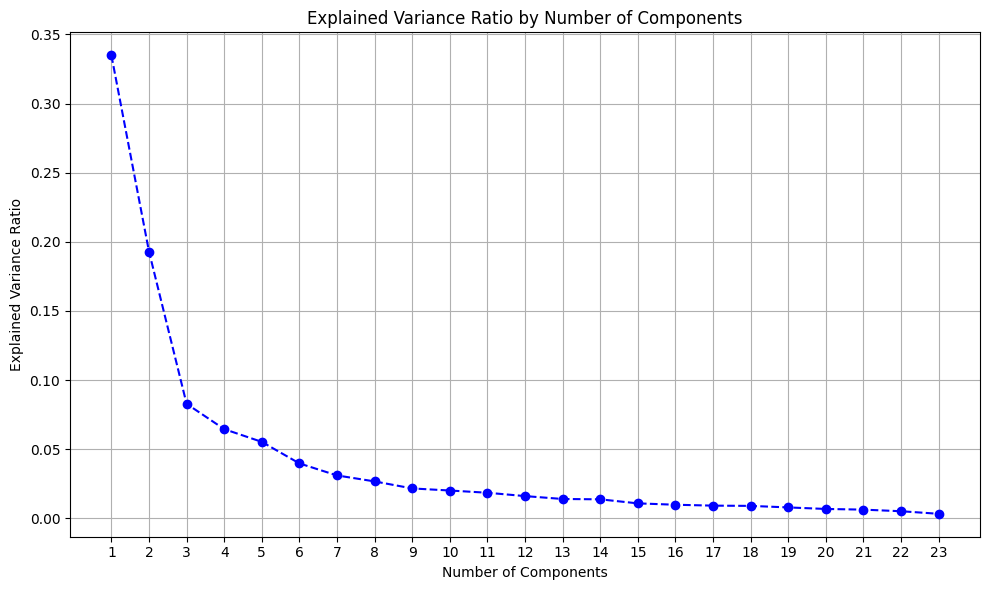

In [22]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_features + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, n_features + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

therefore we are going to pick 5 components

In [24]:
pca = CustomPCA(n_components=5)
pca.fit(df_standardized)

# Get explained variance ratio
explained_variance_ratio = pca.get_explained_variance_ratio()
print("Explained Variance Ratio for the first 5 components:", explained_variance_ratio)
print(sum(explained_variance_ratio))

Explained Variance Ratio for the first 5 components: [0.33494582 0.19298624 0.08280891 0.06450962 0.05528815]
0.7305387398906826


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [26]:
pca_result = pca.transform(df_standardized)

food_group_column = df['FoodGroup']

# Create a new DataFrame with the first 5 components and FoodGroup column
pca_df = pd.DataFrame(data=pca_result[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['FoodGroup'] = food_group_column.values

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,FoodGroup
0,2.722075,1.356245,-2.606560,-3.028539,3.207356,Dairy and Egg Products
1,2.619755,1.223521,-2.571043,-2.915712,3.231295,Dairy and Egg Products
2,3.247408,1.469221,-2.985217,-2.821037,3.337247,Dairy and Egg Products
3,-1.891484,0.945027,-0.561339,-2.586248,1.727675,Dairy and Egg Products
4,-1.504204,1.031032,-0.871736,-2.592677,2.010811,Dairy and Egg Products


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

Correlation matrix between principal components:
              PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00  3.264047e-17  6.361724e-16 -6.829281e-17  6.123334e-16
PC2  3.264047e-17  1.000000e+00 -4.074755e-16 -2.623081e-16  1.404418e-17
PC3  6.361724e-16 -4.074755e-16  1.000000e+00  3.333224e-16 -7.048816e-16
PC4 -6.829281e-17 -2.623081e-16  3.333224e-16  1.000000e+00 -1.613624e-16
PC5  6.123334e-16  1.404418e-17 -7.048816e-16 -1.613624e-16  1.000000e+00


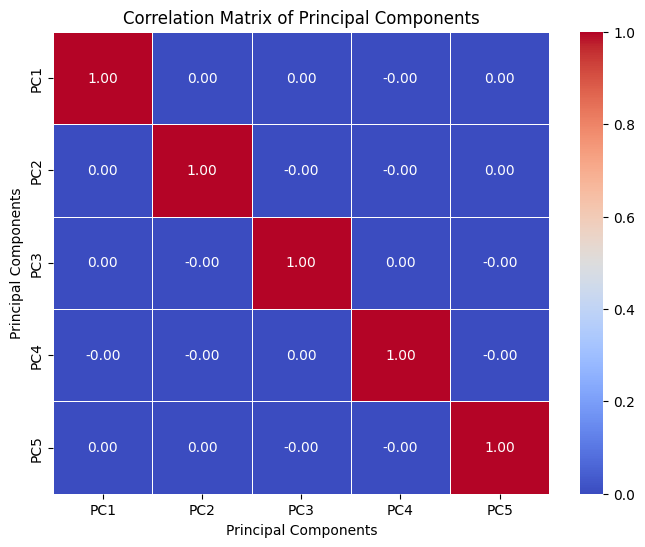

In [28]:
pca_df = pd.DataFrame(data=pca_result[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Compute correlation matrix
corr_matrix = pca_df.corr()

# Display correlation matrix
print("Correlation matrix between principal components:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Principal Components')
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

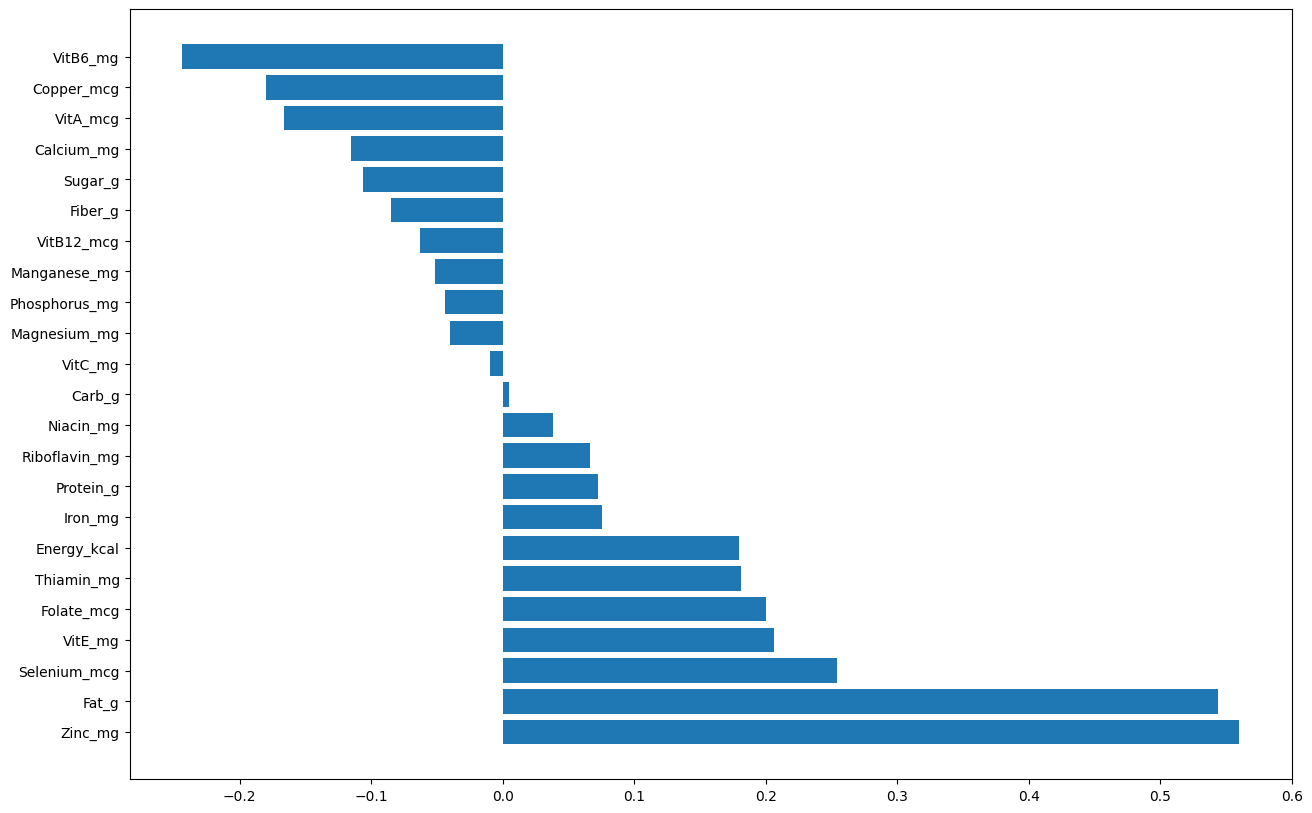

In [38]:
n_features = df_standardized.shape[1]

# Initialize and fit CustomPCA
pca = CustomPCA(n_components=n_features)
pca.fit(df_standardized)

# Transform your data
pca_result = pca.transform(df_standardized)

eigenvectors = pca.get_components()

plt.figure(figsize=(15, 10))

idx = np.argsort(eigenvectors[0])
features = df_numeric.columns[idx]
plt.barh(range(len(idx)), -eigenvectors[0, idx])
plt.yticks(range(len(idx)), features)
plt.show()

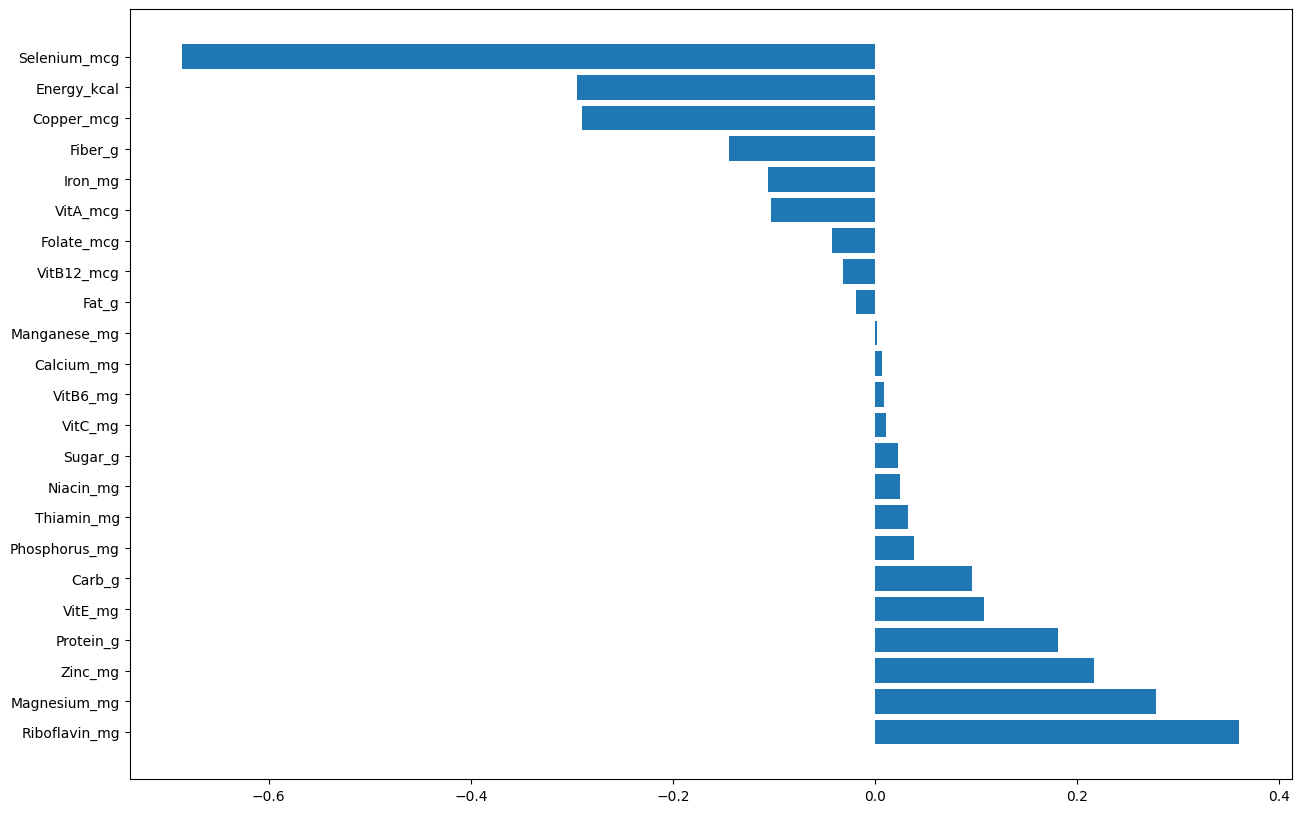

In [40]:
eigenvectors = pca.get_components()

plt.figure(figsize=(15, 10))

idx = np.argsort(-eigenvectors[1])
features = df_numeric.columns[idx]
plt.barh(range(len(idx)), eigenvectors[1, idx])
plt.yticks(range(len(idx)), features)
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">YOUR ANSWER</span>



The plots depicting the contributions of features to the first and second principal components (PC1 and PC2) provide insights into how each original feature contributes to the variance captured by these components:

### PC1:
- **Interpretation**:
  - Features with bars extending to the right contribute positively to PC1.
  - Features with bars extending to the left contribute negatively to PC1.
  - The magnitude (length) of the bar indicates the strength of the contribution.
  
- **Insights**:
  - Large positive bars indicate features that strongly influence the direction of maximum variance in the dataset.
  - Large negative bars indicate features that have a strong negative influence on PC1.

### PC2:
- **Interpretation**:
  - Similarly, features with bars extending to the right contribute positively to PC2.
  - Features with bars extending to the left contribute negatively to PC2.
  - The length of the bars represents the strength of the contribution.

- **Insights**:
  - PC2 captures a different direction of variance compared to PC1.
  - Features with significant positive or negative contributions to PC2 may represent patterns orthogonal to those captured by PC1.

Together, these plots allow us to understand the unique contributions of each feature to the principal components extracted through PCA. PC1 and PC2 represent the primary directions of variance in the dataset, with each feature's contribution helping to characterize the underlying structure and relationships between variables.


### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

<ipython-input-44-e8769ee05903>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FoodGroup', data=top_500_pca1, palette='viridis', order=top_500_pca1['FoodGroup'].value_counts().index)


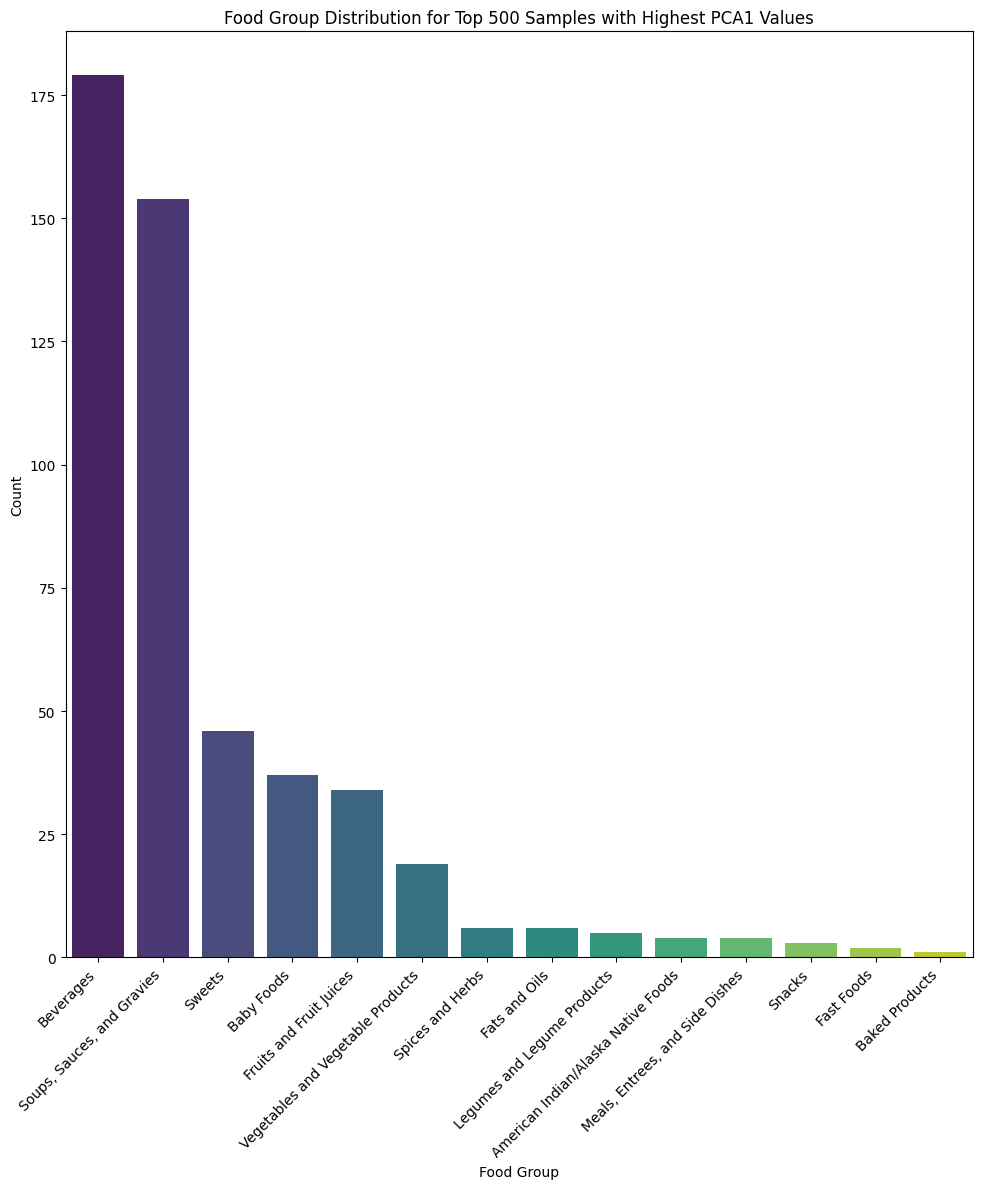

In [44]:
pca_df = pd.DataFrame(pca_result[:, 0], columns=['PCA1'])
pca_df['FoodGroup'] = df['FoodGroup']

# Sort by PCA1 values and select top 500 samples
top_500_pca1 = pca_df.nlargest(500, 'PCA1')

plt.figure(figsize=(10, 12))
sns.countplot(x='FoodGroup', data=top_500_pca1, palette='viridis', order=top_500_pca1['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution for Top 500 Samples with Highest PCA1 Values')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

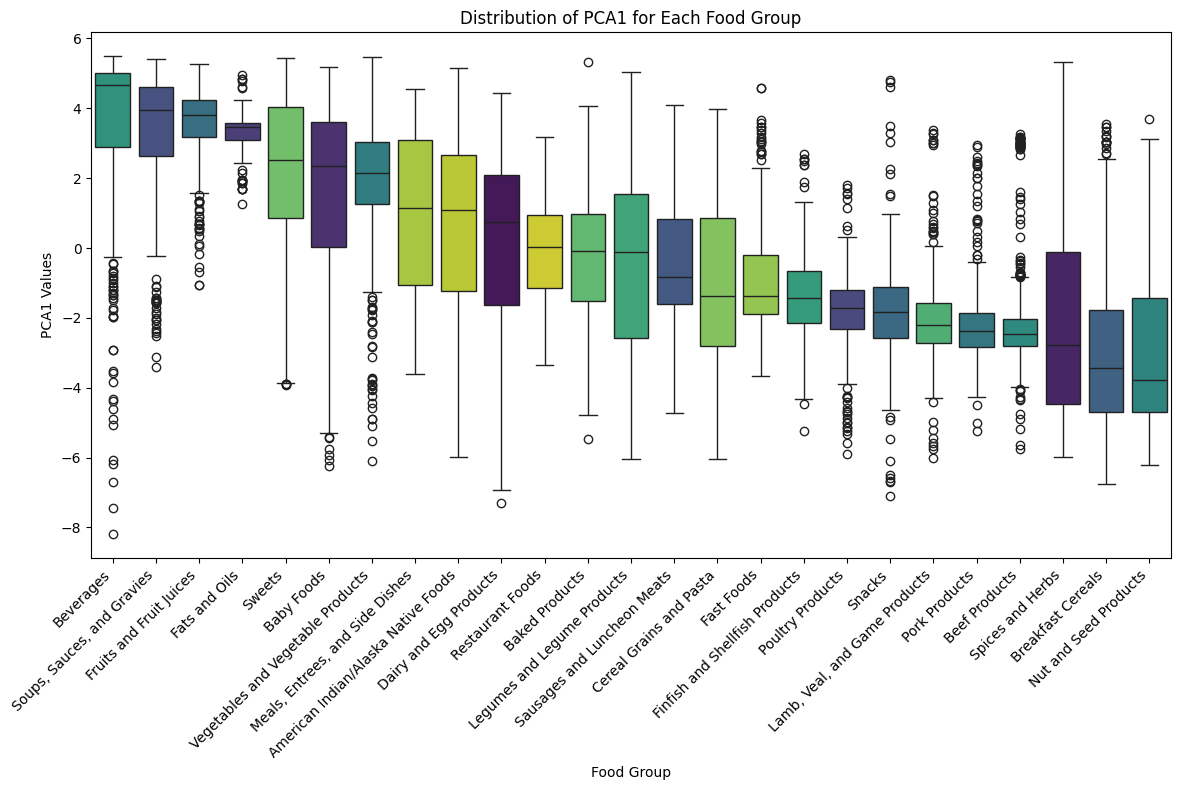

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='PCA1', x='FoodGroup', data=pca_df, hue='FoodGroup', palette='viridis',
            orient='v', order=pca_df.groupby('FoodGroup')['PCA1'].median().sort_values(ascending=False).index,
            legend=False)
plt.title('Distribution of PCA1 for Each Food Group')
plt.ylabel('PCA1 Values')
plt.xlabel('Food Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Do the same for pca2.

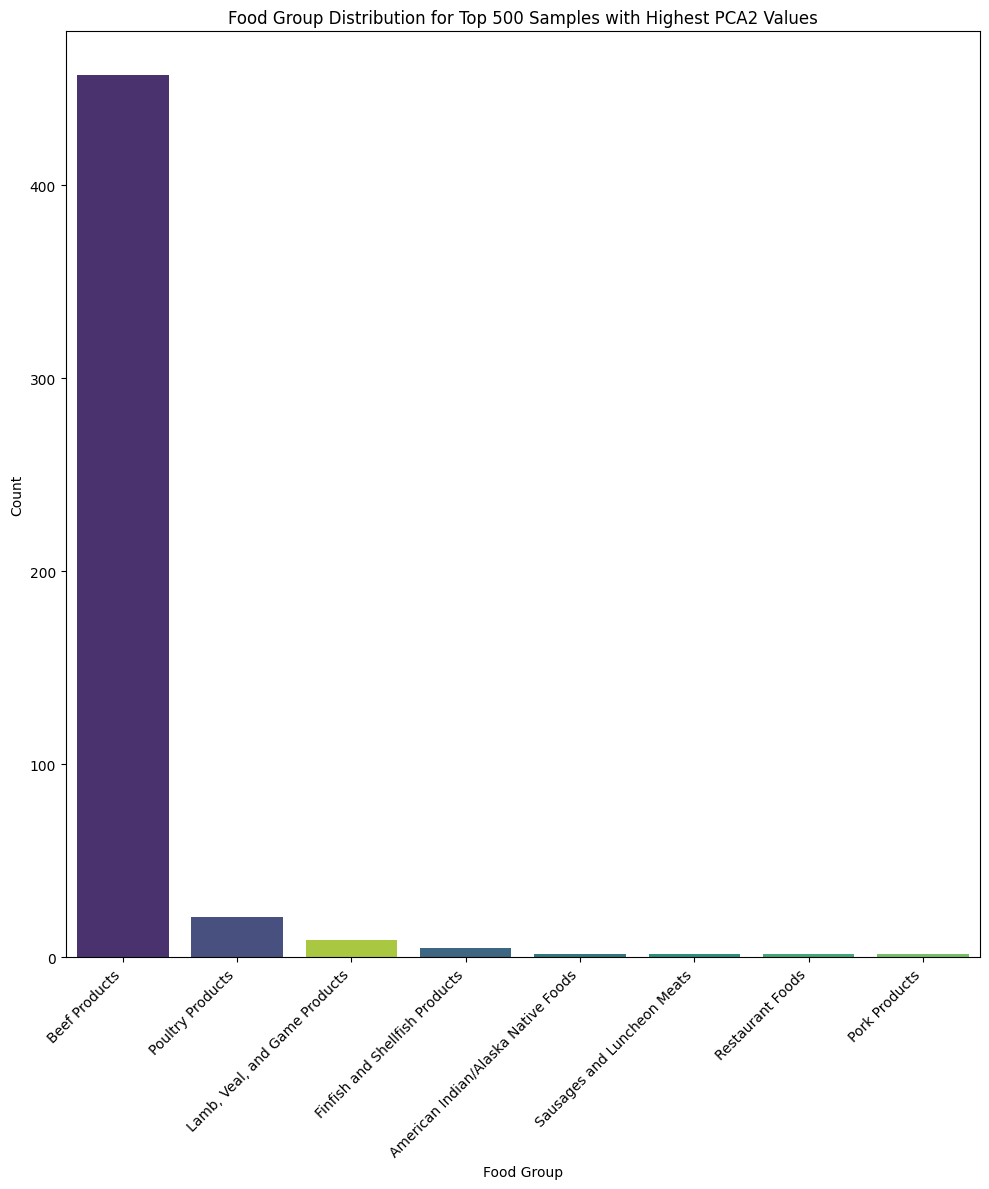

In [49]:
pca_df = pd.DataFrame(pca_result[:, 1], columns=['PCA2'])
pca_df['FoodGroup'] = df['FoodGroup']

top_500_pca2 = pca_df.nlargest(500, 'PCA2')

plt.figure(figsize=(10, 12))
sns.countplot(x='FoodGroup', data=top_500_pca2, hue='FoodGroup', palette='viridis', order=top_500_pca2['FoodGroup'].value_counts().index, legend=False)

plt.title('Food Group Distribution for Top 500 Samples with Highest PCA2 Values')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


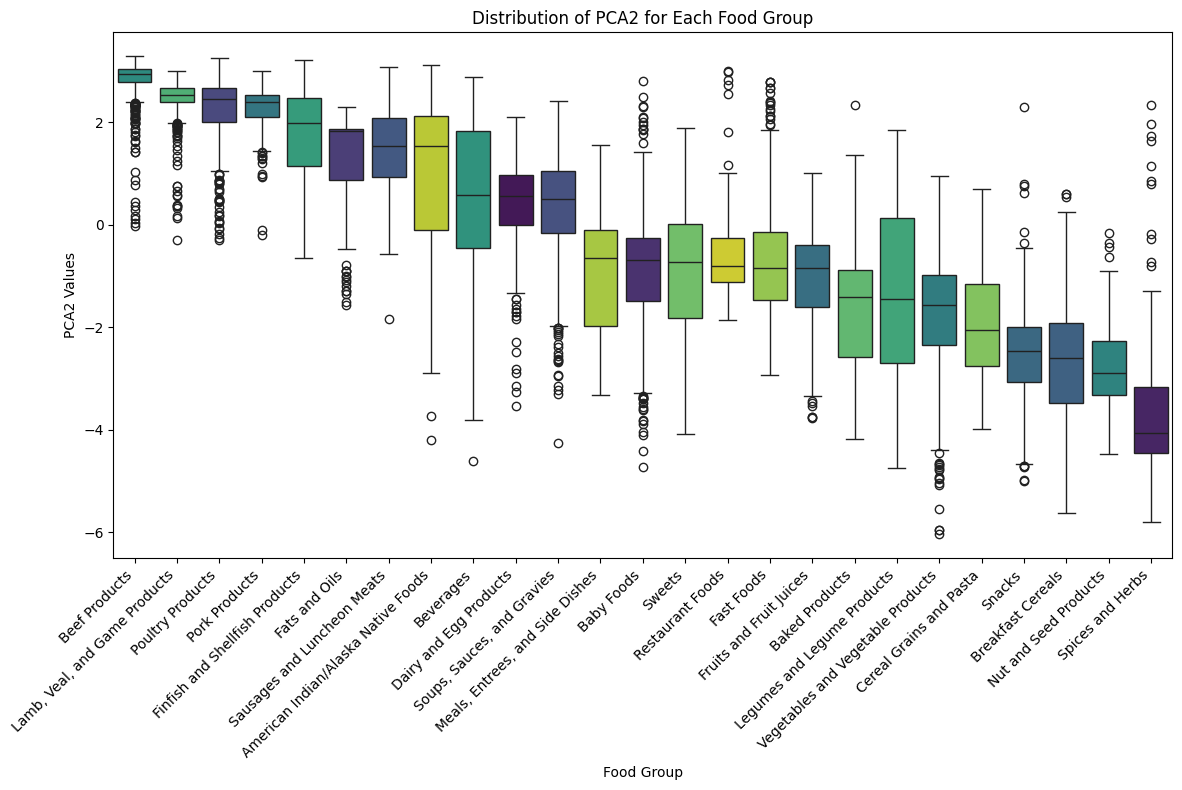

In [50]:
# Plot the distribution of PCA2 for each food group
plt.figure(figsize=(12, 8))
sns.boxplot(y='PCA2', x='FoodGroup', data=pca_df, hue='FoodGroup', palette='viridis',
            orient='v', order=pca_df.groupby('FoodGroup')['PCA2'].median().sort_values(ascending=False).index,
            legend=False)
plt.title('Distribution of PCA2 for Each Food Group')
plt.ylabel('PCA2 Values')
plt.xlabel('Food Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


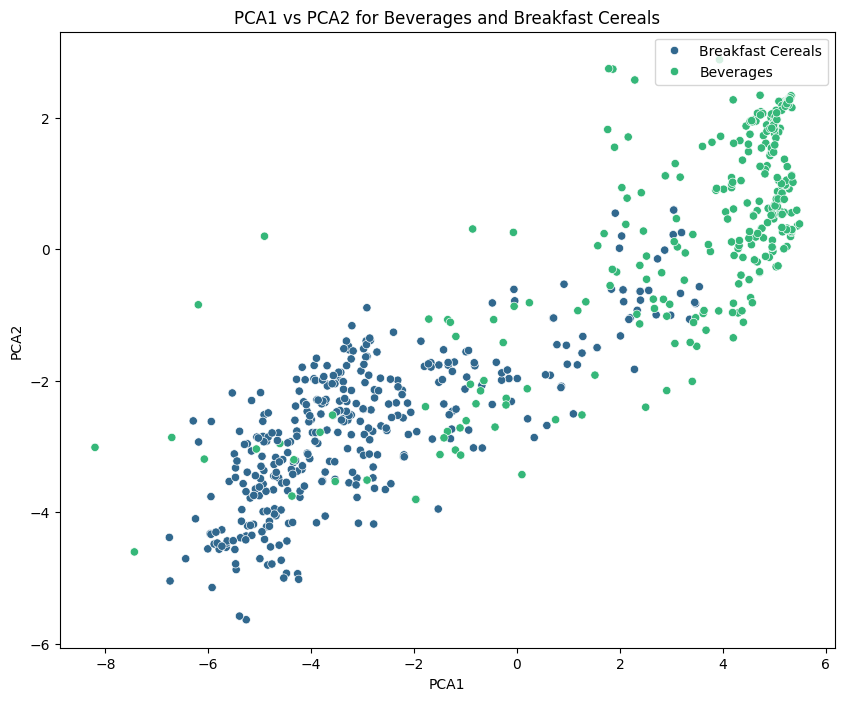

In [55]:

pca_df = pd.DataFrame(pca_result[:, :2], columns=['PCA1', 'PCA2'])
pca_df['FoodGroup'] = df['FoodGroup']

# Filter for Beverages and Breakfast Cereals
subset_pca_df = pca_df[pca_df['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

# Plot PCA1 and PCA2
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=subset_pca_df, hue='FoodGroup', palette='viridis')
plt.title('PCA1 vs PCA2 for Beverages and Breakfast Cereals')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='upper right')
plt.show()


### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">Your Answer</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">Your answer</span>



From the plots in the last subsection (distributions), we can infer the following:

1. **PCA1 Distribution by Food Group**:
   - **Beverages**: Beverages show a broader distribution of PCA1 values, indicating variability in nutrient composition across different types of beverages.
   - **Breakfast Cereals**: Breakfast cereals tend to cluster around lower PCA1 values, suggesting they have a more consistent nutrient profile compared to beverages.

2. **Food Group Contributions to PCA Components**:
   - **Beverages**: Certain beverages may contribute more significantly to PCA1 values, possibly due to higher concentrations of specific nutrients or ingredients.
   - **Breakfast Cereals**: The distribution of PCA1 values for breakfast cereals suggests a narrower range, indicating less variability in nutrient composition compared to beverages.

These observations highlight that PCA1 captures variability in nutrient composition across different food groups, with beverages exhibiting greater diversity and potentially higher nutritional variance compared to breakfast cereals.


________________________________________________________________________________
The last plot, which shows PCA1 and PCA2 for Beverages and Breakfast Cereals, provides a visual representation of how these food groups are positioned in the PCA space based on their nutrient profiles.

- **PCA1 vs PCA2 Plot**: This plot reveals the relative positioning of Beverages and Breakfast Cereals in a two-dimensional space derived from PCA. It shows how these food groups cluster or spread out based on their principal components, which are linear combinations of the original nutrient features.

- **Distribution of PCA1 by Food Group**: The distribution of PCA1 values for each food group provides insight into the variability and range of nutrient compositions within Beverages and Breakfast Cereals. Beverages, with a broader distribution of PCA1 values, suggest greater variability in nutrient profiles compared to Breakfast Cereals, which exhibit a more concentrated range of PCA1 values.

**Relationship**: The last plot and the distribution of PCA1 in each food group complement each other by:
- **Confirmation**: The distribution of PCA1 values validates the relative positions seen in the PCA1 vs PCA2 plot. For instance, if Beverages are spread widely in the PCA1 vs PCA2 plot, their distribution of PCA1 values would likely be broader, reflecting higher variability in nutrient composition.
- **Insight into Variability**: Together, they provide insights into how different food groups vary in their nutrient profiles. Beverages, as shown in both plots, demonstrate greater diversity in nutrient composition, whereas Breakfast Cereals exhibit a more consistent profile.

Overall, these visuals help us understand not only the relative positioning of food groups in PCA space but also the spread and variability in their nutrient compositions captured by PCA1.
